# Inductive bias

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import sys 
from importlib import reload
sys.path.append("..//Experiment1")
import E1_Functions as func

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")

# set title font size
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Enable LaTeX font rendering
#plt.rcParams.update({
#    "text.usetex": True,            # Use LaTeX for all text
#    "font.family": "serif",         # Set the font family to serif (LaTeX default)
#    "font.serif": ["Computer Modern"]  # Use Computer Modern font (LaTeX default font)
#})


In [43]:
save_results = False
save_plots = False

In [44]:
reload(func);

# Example

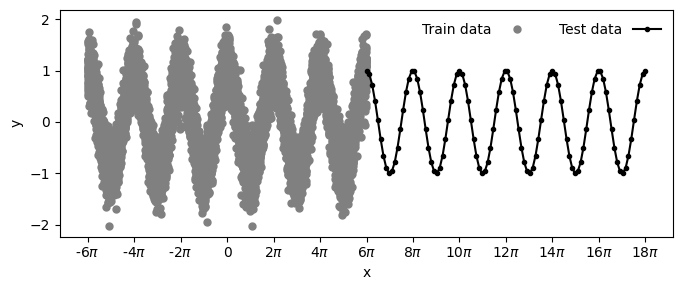

In [111]:
# GENERATE DATA
reload(func);

# Parameters for sine wave dataset
num_points = 10000 #40 #50 #100
noise_std = 0.3

n_waves = 6 #6

# Generate data
train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=True)

# Plot an example sample
func.plot_data_example(train_x_array, train_y_array, test_x_array, test_y_array)

In [113]:
# TRAIN MODEL
input_size, hidden_sizes, output_size = 1, [64, 64], 1
batch_size = 25
print_every = 300
lr = 0.01

# Convert data to tensors and create dataloaders
train_x, train_y, test_x, test_y = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

# ReLU training

In [114]:
###### ReLUMLP ######
num_epochs = 100

ReLU_train_pred = []
ReLU_test_pred = []

for i in range(10):
    ReLuMLP = func.ReLUMLP(input_size, hidden_sizes, output_size)
    model_ReLUMLP, train_losses_MLP, val_losses_MLP = func.train_model(ReLuMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_ReLUMLP.eval()
    with torch.no_grad():
        train_pred = model_ReLUMLP(train_x).numpy().squeeze()
        test_pred = model_ReLUMLP(test_x).numpy().squeeze()
        ReLU_train_pred.append(train_pred)
        ReLU_test_pred.append(test_pred)

    #fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    #ax.plot(train_losses_MLP, label='ReLU train', color=colors[0])
    #ax.plot(val_losses_MLP, label='ReLU validation', ls = '--', color=colors[0], alpha=0.5)
    #ax.set_xlabel('Epoch')
    #ax.set_ylabel('Loss')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.legend(loc='lower left', frameon=False, ncols=4)
    #ax.set_xlim(1, num_epochs)
    ##ax.set_ylim(1e-3, 1e2)
    #plt.tight_layout()


# Tanh training

In [87]:
###### TanhMLP ######
num_epochs = 100

Tanh_train_pred = []
Tanh_test_pred = []

for i in range(10):
    TanhMLP = func.TanhMLP(input_size, hidden_sizes, output_size)
    model_TanhMLP, train_losses_TanhMLP, val_losses_TanhMLP = func.train_model(TanhMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_TanhMLP.eval()
    with torch.no_grad():
        train_pred = model_TanhMLP(train_x).numpy().squeeze()
        test_pred = model_TanhMLP(test_x).numpy().squeeze()
        Tanh_train_pred.append(train_pred)
        Tanh_test_pred.append(test_pred)
        
    #fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    #ax.plot(train_losses_TanhMLP, label='Tanh train', color=colors[1])
    #ax.plot(val_losses_TanhMLP, label='Tanh validation', ls = '--', color=colors[1], alpha=0.5)
    #ax.set_xlabel('Epoch')
    #ax.set_ylabel('Loss')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.legend(loc='lower left', frameon=False, ncols=4)
    #ax.set_xlim(1, num_epochs)
    ##ax.set_ylim(1e-3, 1e2)
    #plt.tight_layout()

# Sine training

In [88]:
###### SineMLP ######
num_epochs = 100

Sine_train_pred = []
Sine_test_pred = []

for i in range(10):
    SineMLP = func.SineMLP(input_size, hidden_sizes, output_size)
    model_SineMLP, train_losses_SineMLP, val_losses_SineMLP = func.train_model(SineMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_SineMLP.eval()
    with torch.no_grad():
        train_pred = model_SineMLP(train_x).numpy().squeeze()
        test_pred = model_SineMLP(test_x).numpy().squeeze()
        Sine_train_pred.append(train_pred)
        Sine_test_pred.append(test_pred)

    #fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    #ax.plot(train_losses_SineMLP, label='Sine train', color=colors[2])
    #ax.plot(val_losses_SineMLP, label='Sine validation', ls = '--', color=colors[2], alpha=0.5)
    #ax.set_xlabel('Epoch')
    #ax.set_ylabel('Loss')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.legend(loc='lower left', frameon=False, ncols=4)
    #ax.set_xlim(1, num_epochs)
    ##ax.set_ylim(1e-3, 1e2)
    #plt.tight_layout()

# Snake training

In [89]:
###### SnakeMLP ######
num_epochs = 100

snake_train_pred = []
snake_test_pred = []

for i in range(10):
    SnakeMLP = func.SnakeMLP(input_size, hidden_sizes, output_size)
    model_SnakeMLP, train_losses_SnakeMLP, val_losses_SnakeMLP = func.train_model(SnakeMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_SnakeMLP.eval()
    with torch.no_grad():
        train_pred = model_SnakeMLP(train_x).numpy().squeeze()
        test_pred = model_SnakeMLP(test_x).numpy().squeeze()
        snake_train_pred.append(train_pred)
        snake_test_pred.append(test_pred)

    #fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    #ax.plot(train_losses_SnakeMLP, label='Snake train', color=colors[3])
    #ax.plot(val_losses_SnakeMLP, label='Snake validation', ls = '--', color=colors[3], alpha=0.5)
    #ax.set_xlabel('Epoch')
    #ax.set_ylabel('Loss')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    #ax.legend(loc='lower left', frameon=False, ncols=4)
    #ax.set_xlim(1, num_epochs)
    ##ax.set_ylim(1e-3, 1e2)
    #plt.tight_layout()

# Results

In [115]:
mean = pd.DataFrame(columns=['ReLU', 'Tanh', 'Sine', 'Snake'], index=['Train', 'Test'])
std = pd.DataFrame(columns=['ReLU', 'Tanh', 'Sine', 'Snake'], index=['Train', 'Test'])

mean.loc['Train', 'ReLU'] = np.mean(ReLU_train_pred, axis=0)
mean.loc['Test', 'ReLU'] = np.mean(ReLU_test_pred, axis=0)

mean.loc['Train', 'Tanh'] = np.mean(Tanh_train_pred, axis=0)
mean.loc['Test', 'Tanh'] = np.mean(Tanh_test_pred, axis=0)

mean.loc['Train', 'Sine'] = np.mean(Sine_train_pred, axis=0)
mean.loc['Test', 'Sine'] = np.mean(Sine_test_pred, axis=0)

mean.loc['Train', 'Snake'] = np.mean(snake_train_pred, axis=0)
mean.loc['Test', 'Snake'] = np.mean(snake_test_pred, axis=0)

std.loc['Train', 'ReLU'] = np.std(ReLU_train_pred, axis=0)
std.loc['Test', 'ReLU'] = np.std(ReLU_test_pred, axis=0)

std.loc['Train', 'Tanh'] = np.std(Tanh_train_pred, axis=0)
std.loc['Test', 'Tanh'] = np.std(Tanh_test_pred, axis=0)

std.loc['Train', 'Sine'] = np.std(Sine_train_pred, axis=0)
std.loc['Test', 'Sine'] = np.std(Sine_test_pred, axis=0)

std.loc['Train', 'Snake'] = np.std(snake_train_pred, axis=0)
std.loc['Test', 'Snake'] = np.std(snake_test_pred, axis=0)

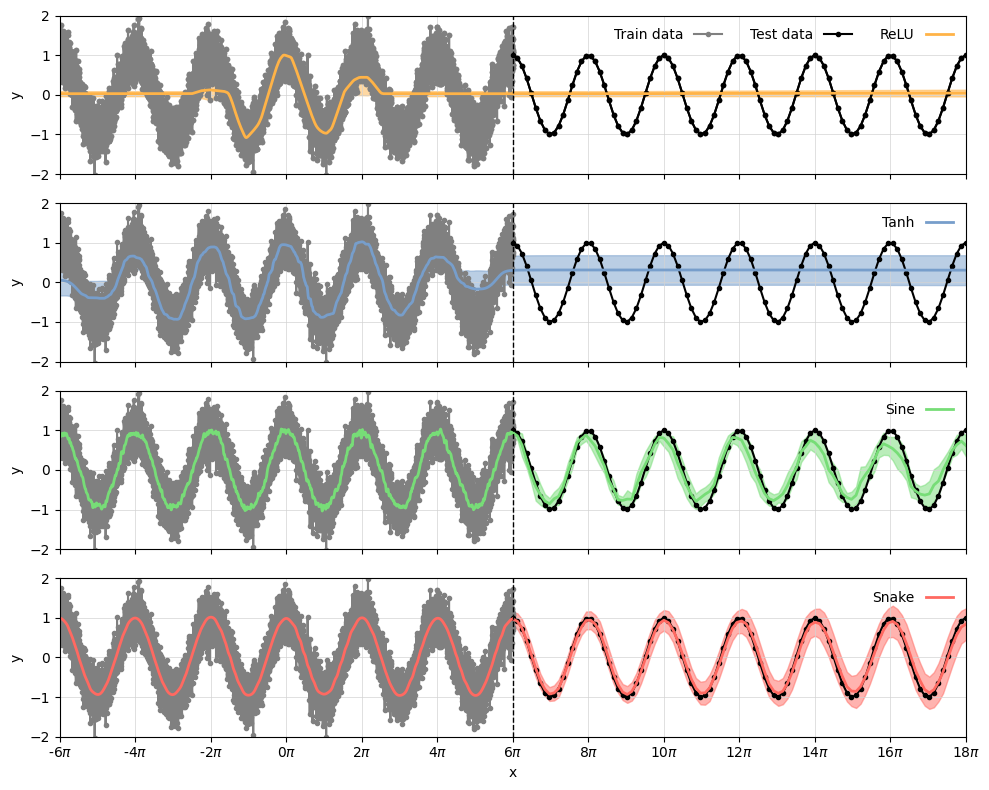

In [131]:
# PLOT RESULTS
# Create a figure and specify GridSpec
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True) #, gridspec_kw={'height_ratios': [2, 1]})

axes[0].plot(train_x_array, train_y_array, label='Train data', color='grey', marker='o', ms=3, ls='-')
axes[0].plot(test_x_array, test_y_array, label='Test data', color='black', marker='o', ms=3, ls='-')

for ax in axes:
    ax.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
    ax.plot(train_x_array, train_y_array, color='grey', marker='o', ms=3, ls='-')
    ax.plot(test_x_array, test_y_array, color='black', marker='o', ms=3, ls='-')

lw = 2
alpha = 0.5

axes[0].plot(train_x_array, mean.loc['Train', 'ReLU'], label='ReLU', color=colors[0], lw=lw)
axes[0].fill_between(train_x_array, mean.loc['Train', 'ReLU'] - std.loc['Train', 'ReLU'], mean.loc['Train', 'ReLU'] + std.loc['Train', 'ReLU'], color=colors[0], alpha=alpha) 
axes[0].plot(test_x_array, mean.loc['Test', 'ReLU'], color=colors[0], ls='-', lw=lw)
axes[0].fill_between(test_x_array, mean.loc['Test', 'ReLU'] - std.loc['Test', 'ReLU'], mean.loc['Test', 'ReLU'] + std.loc['Test', 'ReLU'], color=colors[0], alpha=alpha)

axes[1].plot(train_x_array, mean.loc['Train', 'Tanh'], label='Tanh', color=colors[1], lw=lw)
axes[1].fill_between(train_x_array, mean.loc['Train', 'Tanh'] - std.loc['Train', 'Tanh'], mean.loc['Train', 'Tanh'] + std.loc['Train', 'Tanh'], color=colors[1], alpha=alpha)
axes[1].plot(test_x_array, mean.loc['Test', 'Tanh'], color=colors[1], ls='-', lw=lw)
axes[1].fill_between(test_x_array, mean.loc['Test', 'Tanh'] - std.loc['Test', 'Tanh'], mean.loc['Test', 'Tanh'] + std.loc['Test', 'Tanh'], color=colors[1], alpha=alpha)

axes[2].plot(train_x_array, mean.loc['Train', 'Sine'], label='Sine', color=colors[2], lw=lw)
axes[2].fill_between(train_x_array, mean.loc['Train', 'Sine'] - std.loc['Train', 'Sine'], mean.loc['Train', 'Sine'] + std.loc['Train', 'Sine'], color=colors[2], alpha=alpha)
axes[2].plot(test_x_array, mean.loc['Test', 'Sine'], color=colors[2], ls='-', lw=lw)
axes[2].fill_between(test_x_array, mean.loc['Test', 'Sine'] - std.loc['Test', 'Sine'], mean.loc['Test', 'Sine'] + std.loc['Test', 'Sine'], color=colors[2], alpha=alpha)

axes[3].plot(train_x_array, mean.loc['Train', 'Snake'], label='Snake', color=colors[3], lw=lw)
axes[3].fill_between(train_x_array, mean.loc['Train', 'Snake'] - std.loc['Train', 'Snake'], mean.loc['Train', 'Snake'] + std.loc['Train', 'Snake'], color=colors[3], alpha=alpha)
axes[3].plot(test_x_array, mean.loc['Test', 'Snake'], color=colors[3], ls='-', lw=lw)
axes[3].fill_between(test_x_array, mean.loc['Test', 'Snake'] - std.loc['Test', 'Snake'], mean.loc['Test', 'Snake'] + std.loc['Test', 'Snake'], color=colors[3], alpha=alpha)

for ax in axes:
    ax.vlines(6*np.pi, -2, 2, color='black', ls='--', lw=1)
    ax.set_xlim(-6*np.pi, 18*np.pi)
    ax.set_ylim(-2, 2.)
    ax.legend(loc='upper right', frameon=False, ncol=3, markerfirst=False)  
    ax.set_ylabel('y')

axes[3].set_xlabel('x')

# title for all plots
#fig.suptitle('Predictions')

# set x ticks as pi multiples
xticks = np.arange(-6, 20, 2)
xlabels = [f'{i}$\pi$' for i in xticks]
plt.xticks(xticks*np.pi, xlabels)



plt.tight_layout()
plt.show()


In [132]:
save_results = False

<bound method _AxesBase.set_xticklabels of <Axes: >>

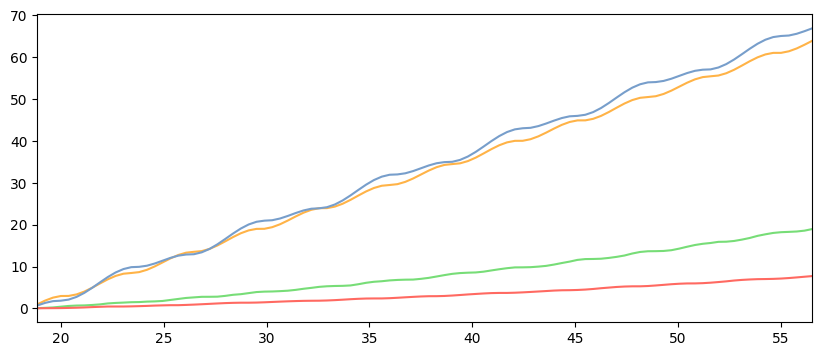

In [133]:
# plot difference between test data and predictions

# Calculate cumulative loss
cumulative_loss_ReLU = np.cumsum(np.abs(test_y_array - mean.loc['Test', 'ReLU']))
cumulative_loss_Tanh = np.cumsum(np.abs(test_y_array - mean.loc['Test', 'Tanh']))
cumulative_loss_Sine = np.cumsum(np.abs(test_y_array - mean.loc['Test', 'Sine']))
cumulative_loss_Snake = np.cumsum(np.abs(test_y_array - mean.loc['Test', 'Snake']))

# save cumulative loss
if save_results:
    np.save('../Experiment3/cumulative_loss_ReLU.npy', cumulative_loss_ReLU)
    np.save('../Experiment3/cumulative_loss_Tanh.npy', cumulative_loss_Tanh)
    np.save('../Experiment3/cumulative_loss_Sine.npy', cumulative_loss_Sine)
    np.save('../Experiment3/cumulative_loss_Snake.npy', cumulative_loss_Snake)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(test_x_array, cumulative_loss_ReLU, label='ReLU', color=colors[0])
ax.plot(test_x_array, cumulative_loss_Tanh, label='Tanh', color=colors[1])
ax.plot(test_x_array, cumulative_loss_Sine, label='Sine', color=colors[2])
ax.plot(test_x_array, cumulative_loss_Snake, label='Snake', color=colors[3])



# ticks
ax.set_xlim(6*np.pi, 18*np.pi)
ax.set_xticklabels
